In [105]:
#Deep Learning - Artificial Neural Network Implementation - Predict whether Customer Exited/not -Dataset - Churn_Modelling

In [106]:
#Step-1 - Load the dataset and check for the NaN values -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df=pd.read_csv('F:/VIJAY SHINDE/Courses_undertaken/Data_Science_with_Python/DS_by_TECHNOGEEKS/Daily lectures/September-2022/07-09-2022-Deep_Learning_End_to_End/Churn_Modelling.csv')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [109]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
#Step-2- Drop the columns which are non correlated -
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [111]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
#Step-3- split the data in x and y axis veriables - by index locting selection [row,columns]
x=df.iloc[:,0:10]
y=df.iloc[:,10]

In [113]:
#Lets Handle Categorical veriables by using getdummies function - you can also use LabelEncoder or OneHotEncoder,etc -
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True) 

#Concatenate the DataFrames -
x=pd.concat([x,geography,gender],axis=1)

#Drop the columns which are non correlated -
x.drop(['Geography','Gender'],axis=1,inplace=True)

In [114]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [115]:
#Lets apply StandardScaler for better scaling -
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x1=scaler.transform(x)
x1

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

In [116]:
#Step-4- Split the data in train_test_split parts -
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=0)

In [117]:
print(X_train.shape)
print(X_test.shape)
print('===========================')
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [140]:
X_train

array([[ 0.17042381, -0.4693113 , -0.00442596, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-2.31280236,  0.29351742, -1.38753759, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [-1.19535058, -0.94607926, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.90504489, -0.37395771, -0.00442596, ..., -0.57873591,
        -0.57380915,  0.91241915],
       [-0.62627792, -0.08789694,  1.37868567, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-0.28483432,  0.86563897, -1.38753759, ...,  1.72790383,
        -0.57380915, -1.09598752]])

In [119]:
#Step-5- Create object for the Algorithm and Now let's make the Artifical Neural Network Model -
import keras
from keras.models import Sequential #Entire Neural Network
from keras.layers import Dense #To create layers (input Layers ,hidden Layers,output Layer)
from keras.layers import ReLU,PReLU,LeakyReLU,ELU  #Activation Functions
from keras.layers import Dropout #To dectivate the neurons to reduce Overfitting(to maintain model accuracy)

In [120]:
#Initilize the ANN -
classifier=Sequential()

In [121]:
#Adding the Input layer - (Generally as a input units=number of input columns, but you can put asmeny neurons you want -
classifier.add(Dense(units=11,kernel_initializer='uniform',activation='relu'))

#Classifier.add(create_layer(neurons_required=11,initilize_kernel_weight_matrix,activation_function=ReLU))

In [122]:
#Adding the First Hidden layer -
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))

In [123]:
#Adding the Second Hidden layer -
classifier.add(Dense(units=2,kernel_initializer='uniform',activation='relu'))

In [124]:
#Adding the Output layer -
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [125]:
#Lets Compile the layers - 
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
#If we want to apply Early Stopping(Stop Training when monitored metrics stop imporving),Otherwise mention epochs value only 
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=20,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [141]:
#Lets fit the model - Here [callbacks=early_stopping] is optional, if you dont want early stopping then dont use it -
model_history = classifier.fit(X_train,y_train,batch_size=10,epochs=1000,validation_split=0.33,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3267 - accuracy: 0.8679 - val_loss: 0.3553 - val_accuracy: 0.8550
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3267 - accuracy: 0.8684 - val_loss: 0.3536 - val_accuracy: 0.8569
Epoch 3/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3260 - accuracy: 0.8679 - val_loss: 0.3629 - val_accuracy: 0.8493
Epoch 4/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3260 - accuracy: 0.8642 - val_loss: 0.3551 - val_accuracy: 0.8569
Epoch 5/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3264 - accuracy: 0.8684 - val_loss: 0.3554 - val_accuracy: 0.8538
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3257 - accuracy: 0.8686 - val_loss: 0.3534 - val_accuracy: 0.8527
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3261 - accuracy: 0.8696 - val_loss: 0.3566 - val_accuracy:

In [143]:
#Step-6- Predict the Y-axis values - 
predict_ann=classifier.predict(X_test)
predict_ann = (predict_ann > 0.5)

63/63 [==============================] - 0s 2ms/step


In [144]:
#Step-7- Model Evaluation and Error check -
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, predict_ann))
print(accuracy_score(predict_ann,y_test))

[[1505   90]
 [ 193  212]]
0.8585


In [137]:
#.......................................Lets Make some Fun.................................................................

In [145]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

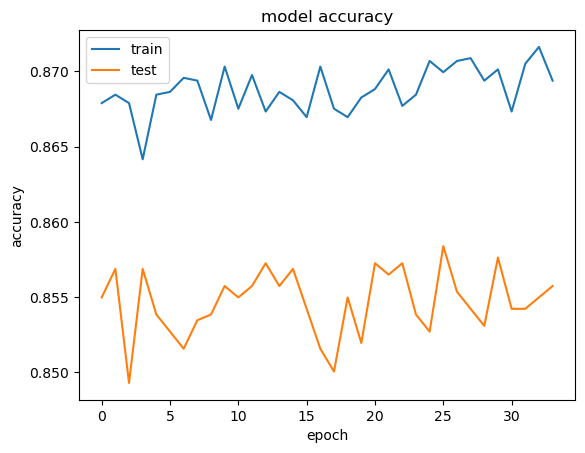

In [146]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

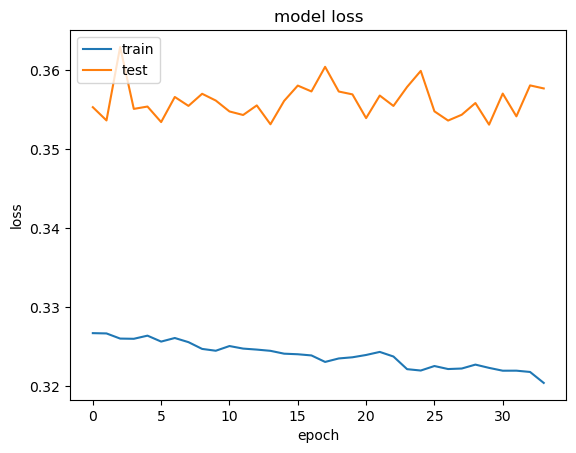

In [147]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
#Thank You................................................................